In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Parenting Survey v2.csv') 

In [3]:
df.head()

,Timestamp,Who is answering this survey?,How many children do you have?,What is your child's age group? (Select all that apply),"What are your biggest parenting challenges? (Select up to 3; if expecting, can select predicted challenges)","On a scale of 1 to 5, how supported do you feel in your parenting journey?",Which of the below would best support your parenting needs?,Where do you seek information about parenting-related issues? (Select the 3 most used),"On a scale of 1 to 5, how confident are you in the parenting information you find?",What features would be most important in a product or service that supports parents? (Select up to 3),"What do you enjoy most about parenting? (if expecting, what do you think you will enjoy most)"
0,2025/03/14 10:08:36 PM MDT,Dad,2,12-24 months;2-5 years,Lack of sleep (parent and/or child) & exhausti...,4,Personalized solutions to your challenges,Google/Reddit/search engines;Social media (e.g...,4,Access to experts or specialists for questions...,I really try and be mindful of the “wins.” Mos...
1,2025/03/14 10:10:28 PM MDT,Mom,1,12-24 months,Lack of sleep (parent and/or child) & exhausti...,4,Anything that makes parenting tasks easier,Google/Reddit/search engines;Parenting website...,4,Personalized parenting tips & insights;Persona...,"watching my child grow up, discover things, an..."
2,2025/03/14 10:22:43 PM MDT,Dad,1,12-24 months,Managing work-life tradeoffs;Handling behavior...,5,Anything that makes parenting tasks easier,Google/Reddit/search engines,3,Access to experts or specialists for questions...,My child's laughter
3,2025/03/14 10:28:51 PM MDT,Mom,2,0-12 months;12-24 months,Lack of sleep (parent and/or child) & exhaustion,5,Anything that saves you time,"Social media (e.g. Instagram, Tik Tok);Pediatr...",3,Personalized plan to tackle specific challenges,Leaning about myself
4,2025/03/14 11:54:19 PM MDT,Mom,2,2-5 years,Lack of sleep (parent and/or child) & exhausti...,3,Anything that saves you time,"Social media (e.g. Instagram, Tik Tok);Family ...",4,Access to experts or specialists for questions...,Seeing the world through their eyes!


In [4]:
df.columns

Index(['Timestamp', 'Who is answering this survey?',
       'How many children do you have?',
       'What is your child's age group? (Select all that apply)',
       'What are your biggest parenting challenges? (Select up to 3; if expecting, can select predicted challenges)',
       'On a scale of 1 to 5, how supported do you feel in your parenting journey?',
       'Which of the below would best support your parenting needs?',
       'Where do you seek information about parenting-related issues? (Select the 3 most used)',
       'On a scale of 1 to 5, how confident are you in the parenting information you find?',
       'What features would be most important in a product or service that supports parents? (Select up to 3)',
       'What do you enjoy most about parenting? (if expecting, what do you think you will enjoy most)'],
      dtype='object')

In [5]:
# Define the age groups for Group 1
group_1_labels = {"I am expecting", "0-12 months", "12-24 months"}

# Create a new column based on age group responses
df["Parenting Group"] = df["What is your child's age group? (Select all that apply)"].apply(
    lambda x: "Group 1" if any(age in str(x) for age in group_1_labels) else "Group 2"
)

# Check the distribution
print(df["Parenting Group"].value_counts())

Parenting Group
Group 2    50
Group 1    17
Name: count, dtype: int64


In [10]:
# List of survey question columns (excluding ID, timestamp, etc.)
survey_questions = [
    "What are your biggest parenting challenges? (Select up to 3; if expecting, can select predicted challenges)",
    "On a scale of 1 to 5, how supported do you feel in your parenting journey?",
    "Which of the below would best support your parenting needs?",
    "Where do you seek information about parenting-related issues? (Select the 3 most used)",
    "On a scale of 1 to 5, how confident are you in the parenting information you find?",
    "What features would be most important in a product or service that supports parents? (Select up to 3)",
]

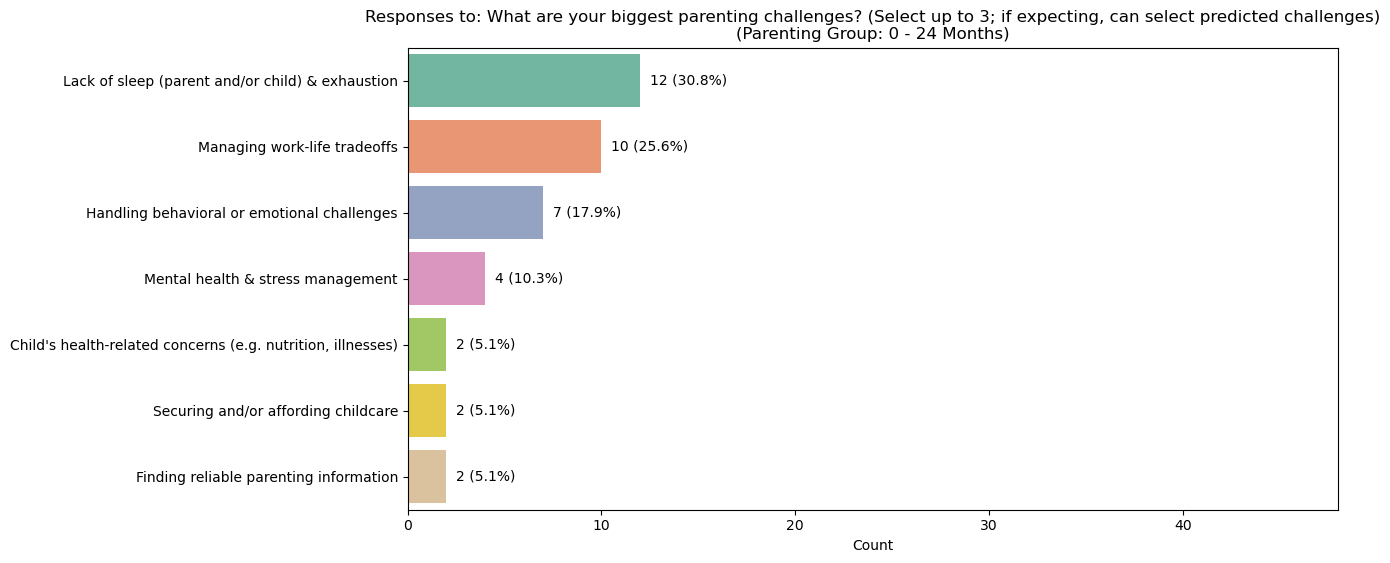

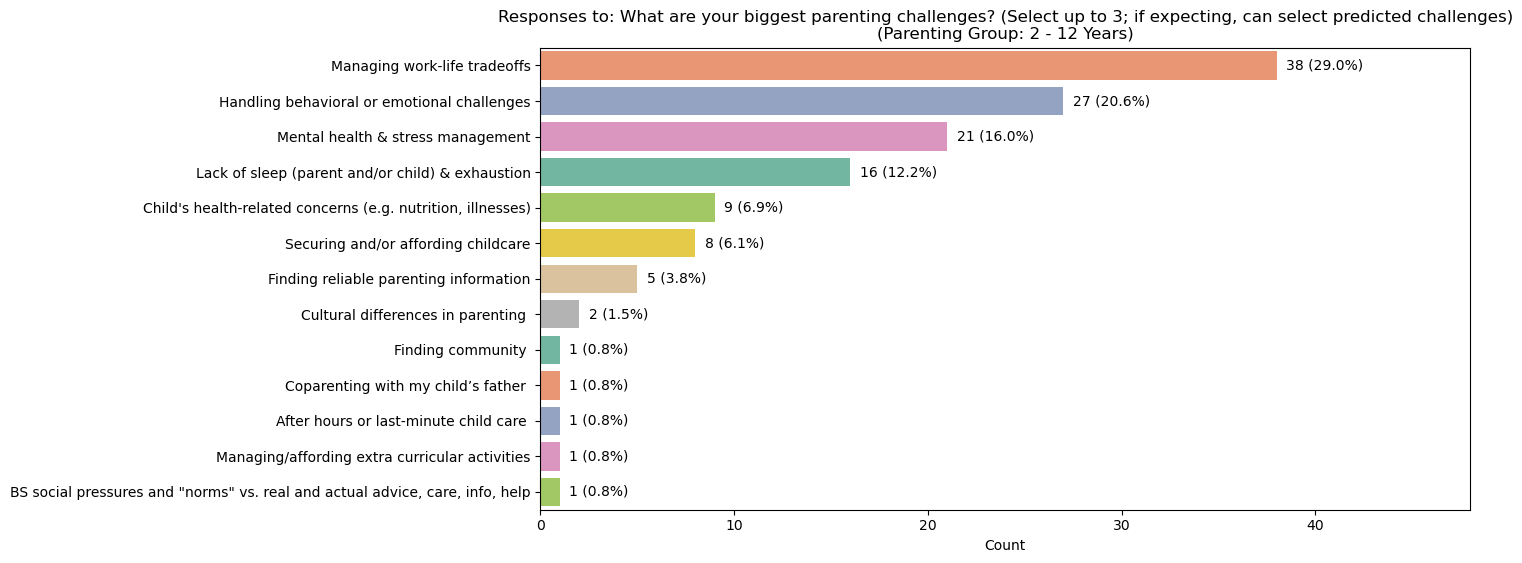

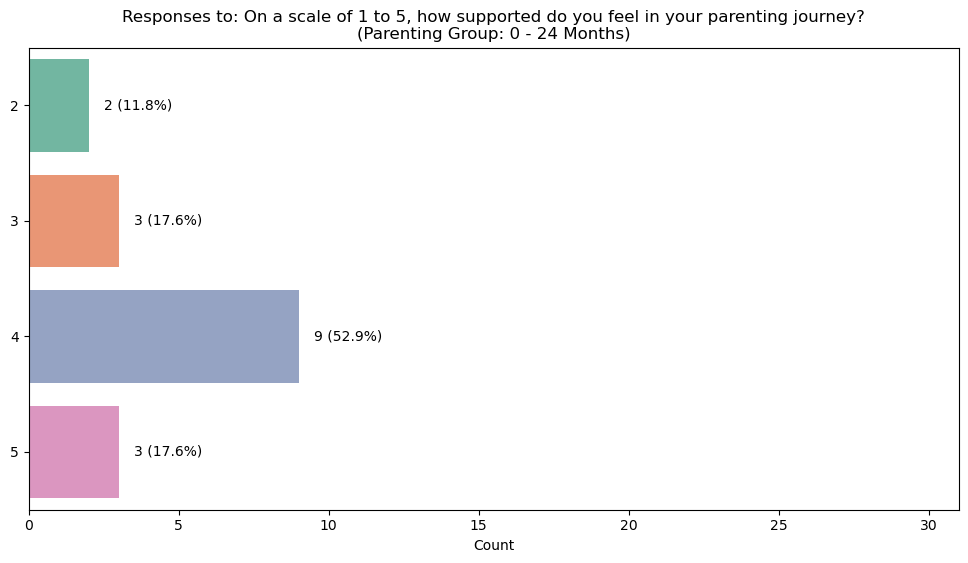

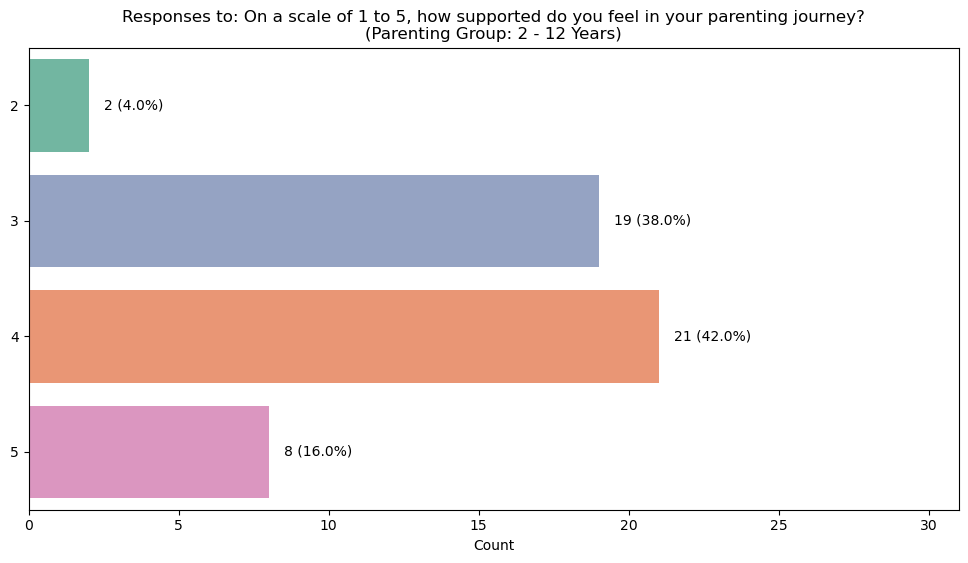

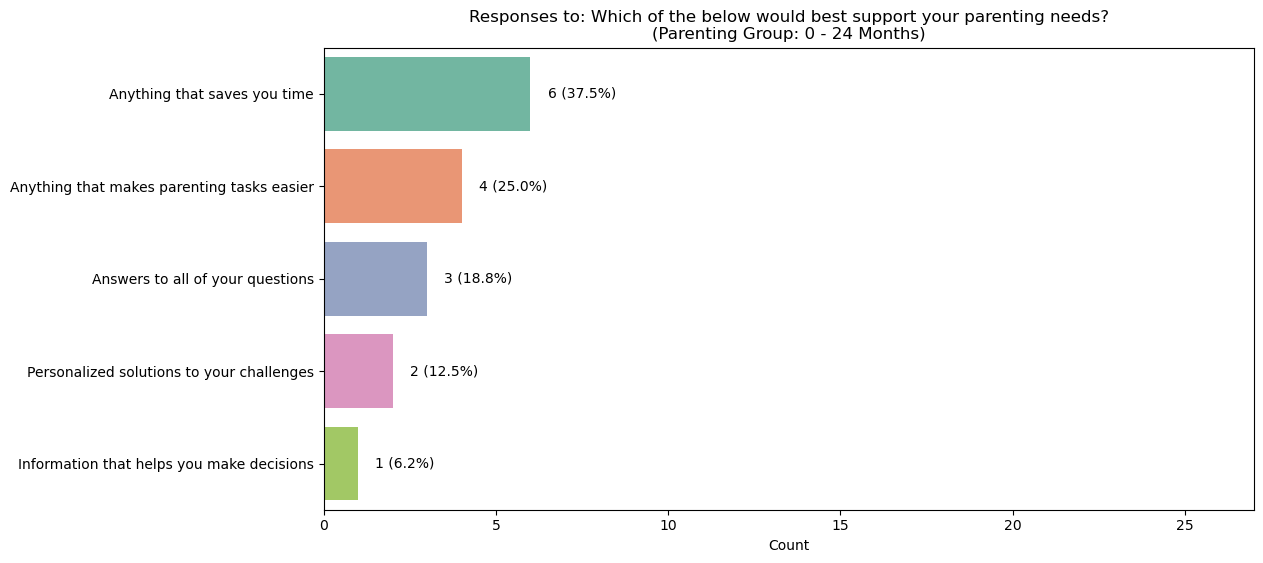

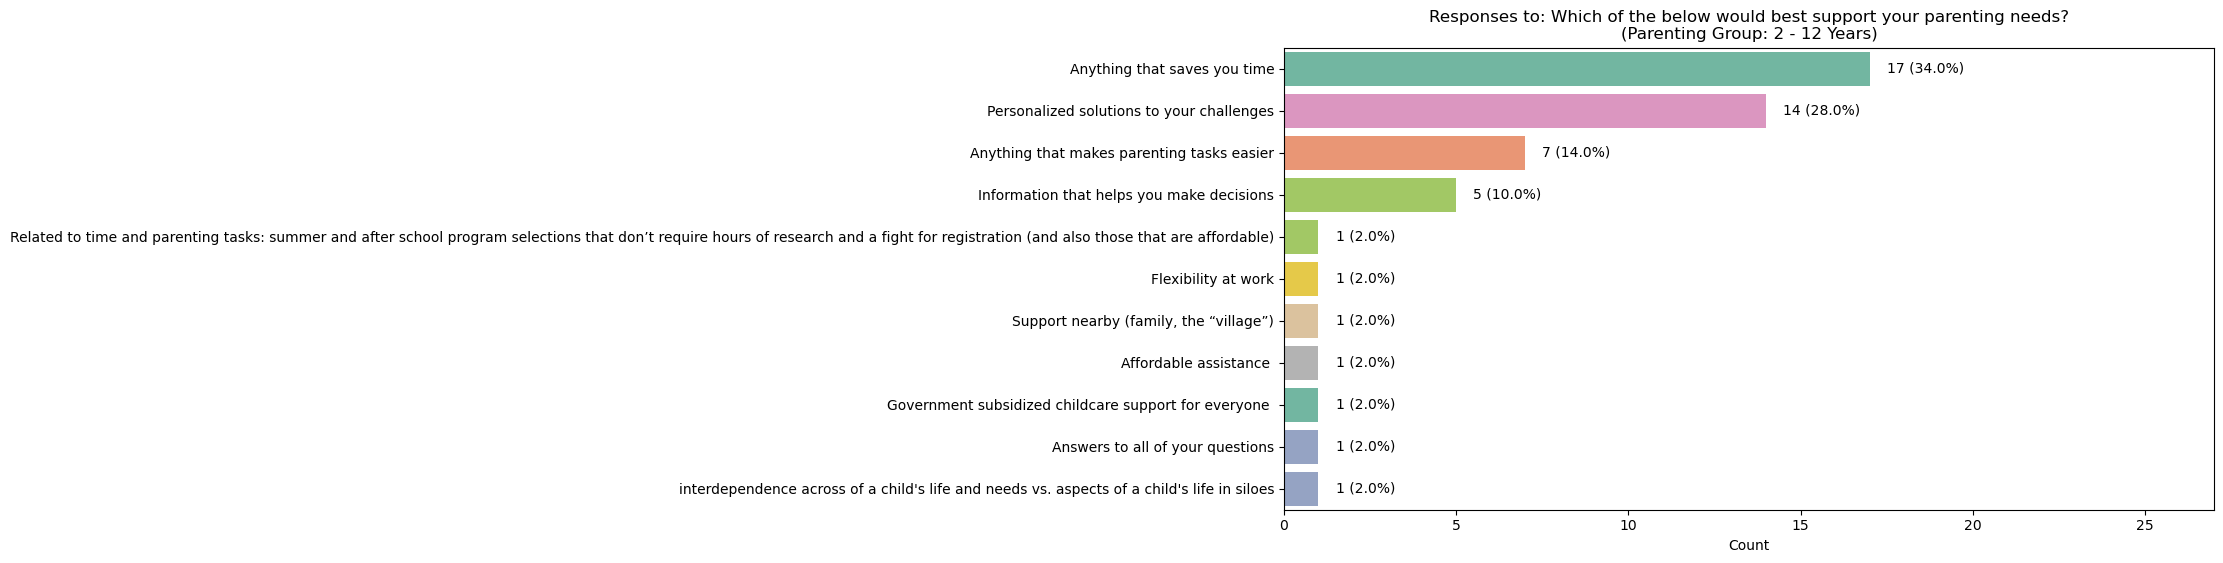

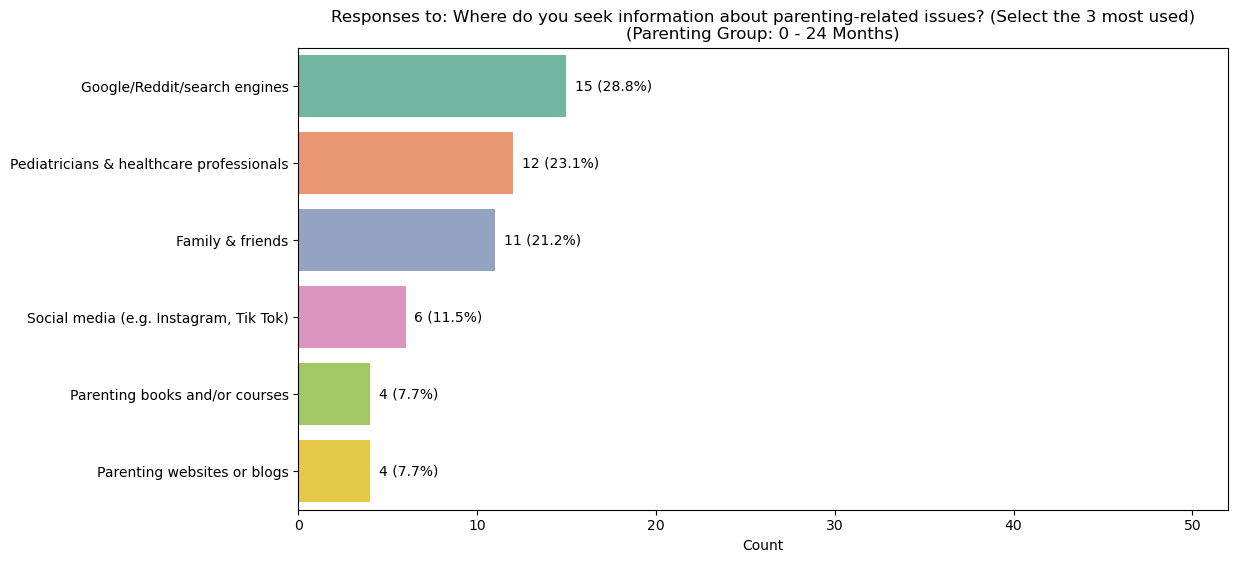

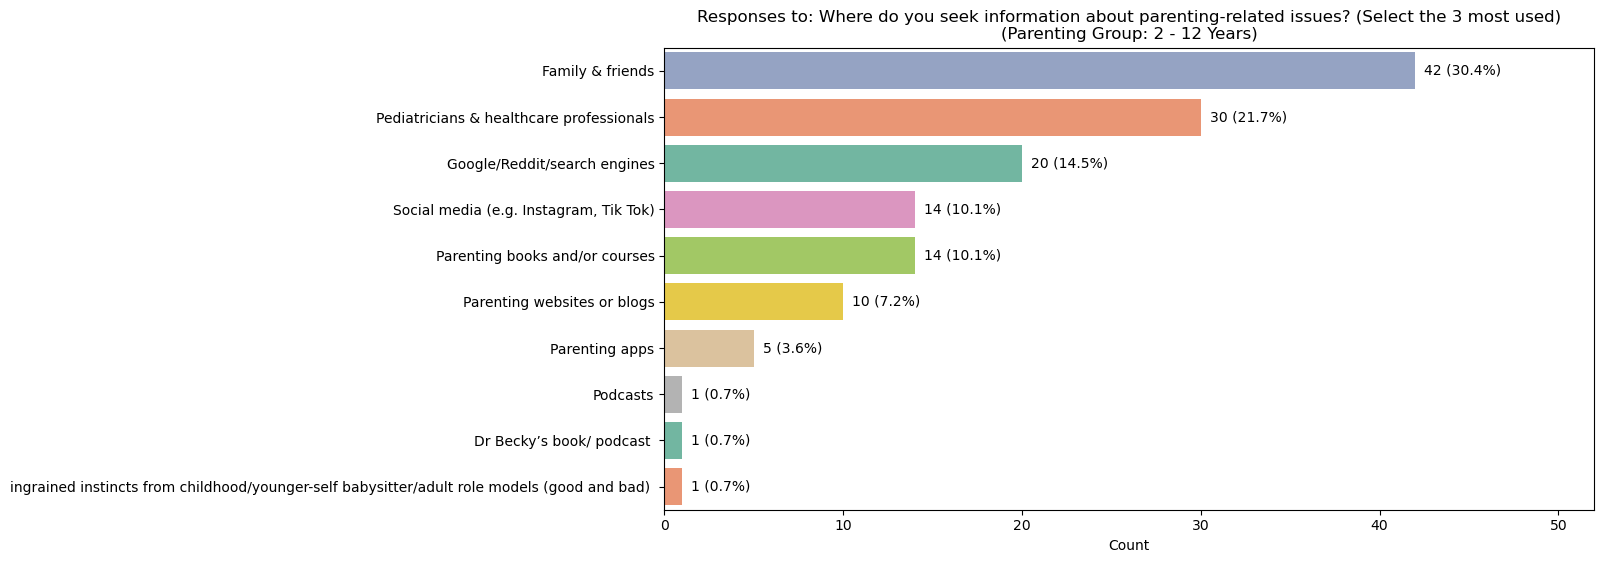

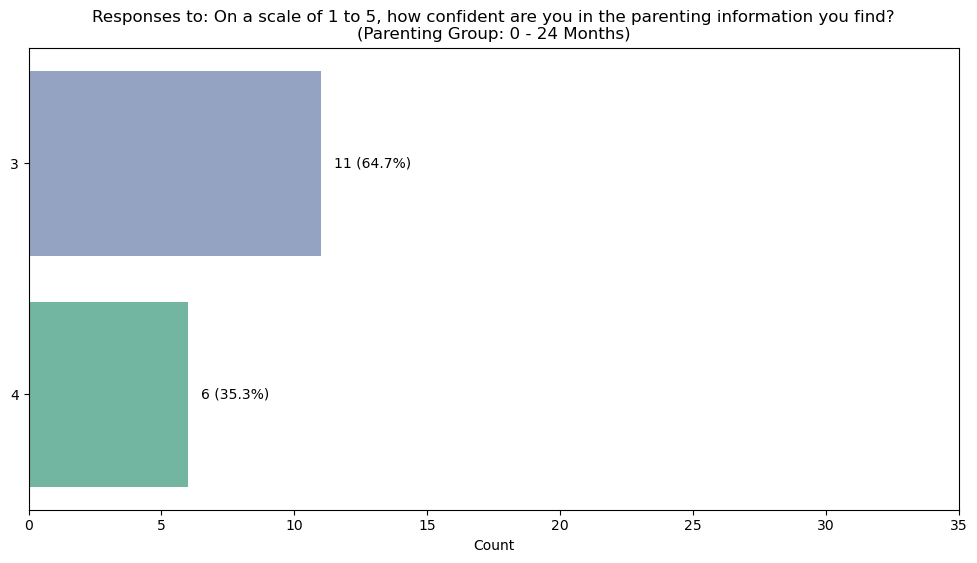

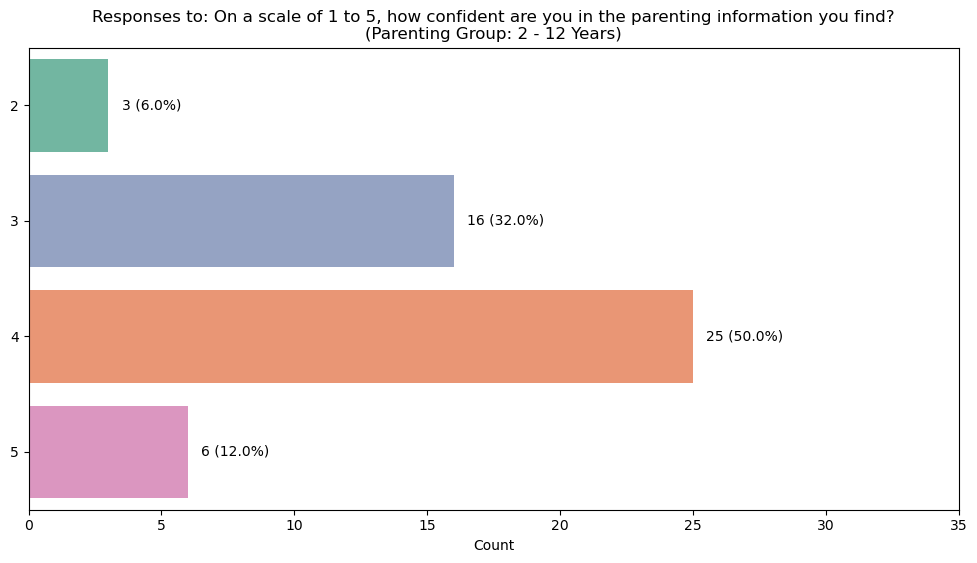

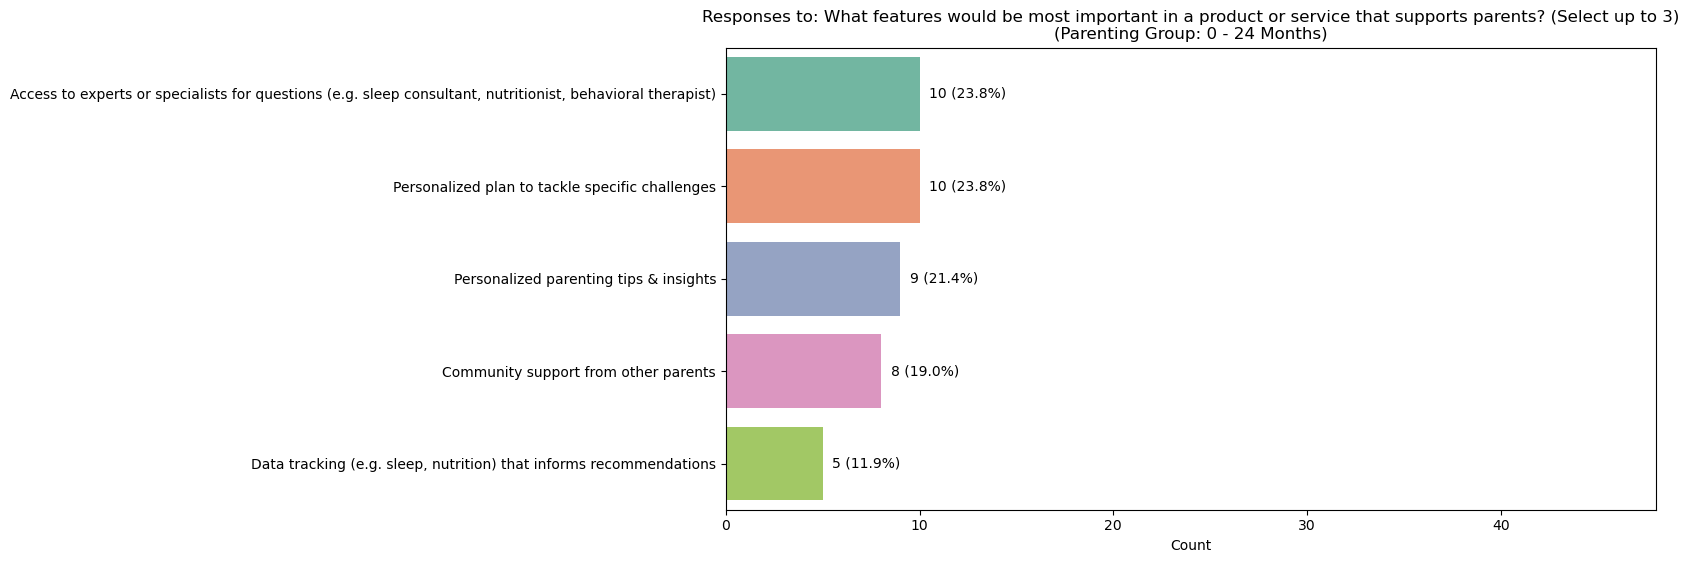

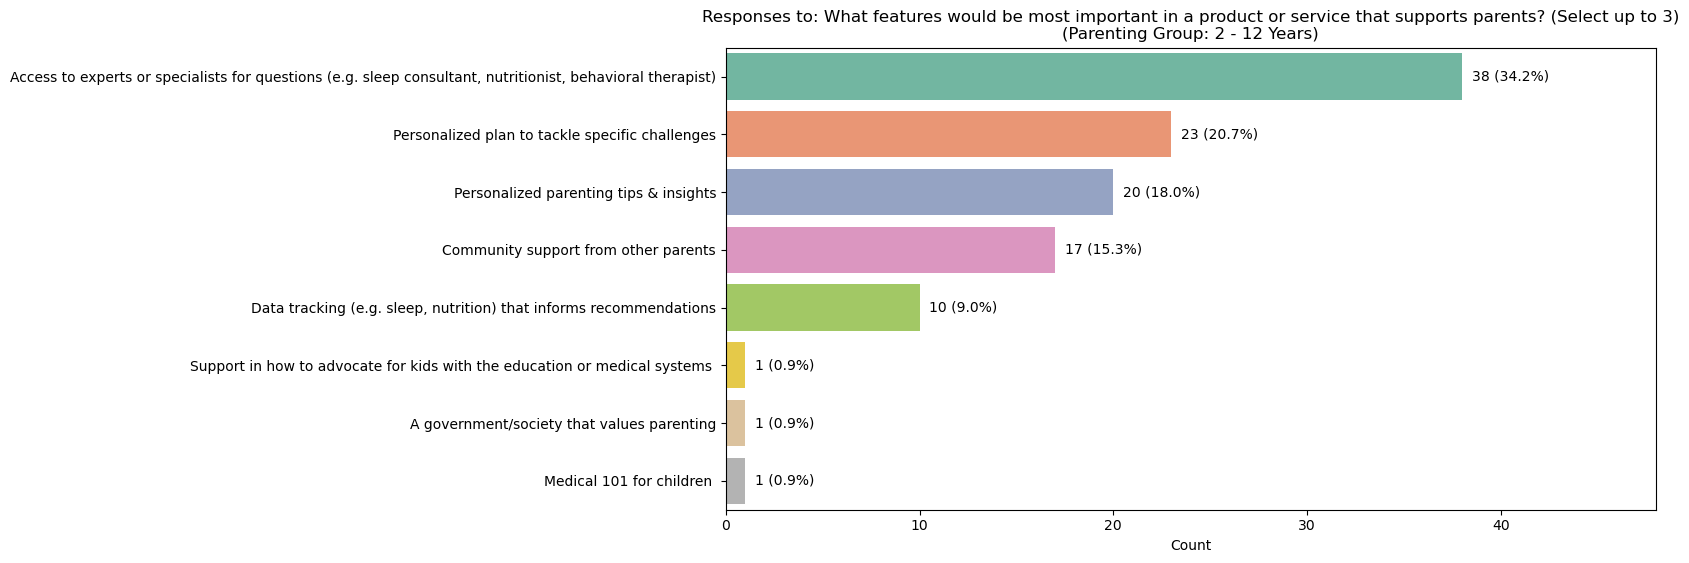

In [12]:
def plot_all_survey_questions_separate(df, question_columns, multi_select_questions, group_col="Parenting Group"):
    """
    Generates separate horizontal bar charts for each parenting group for all survey questions,
    using consistent colors for the same responses across all charts. 
    The x-axis is synchronized between the two groups (0 - 24 Months and 2 - 12 Years).
    
    Parameters:
        df (pd.DataFrame): The survey data.
        question_columns (list): List of survey question column names to visualize.
        multi_select_questions (list): Questions with multiple selections (responses separated by semicolons).
        group_col (str): The column used for grouping (default is "Parenting Group").
    """
    # Rename groups for clarity
    group_rename = {
        "Group 1": "0 - 24 Months",
        "Group 2": "2 - 12 Years"
    }

    # Initialize a color palette
    color_palette = sns.color_palette("Set2", len(df[question_columns[0]].unique()))  # Use Set2 palette

    # Initialize a dictionary to store consistent colors
    response_colors = {}

    # Process each question and plot
    for question_col in question_columns:
        # Find the maximum count for both groups first to sync the x-axis
        max_count = 0
        for group in df[group_col].unique():
            # Filter data for the specific parenting group
            df_filtered = df[df[group_col] == group]

            # If it's a multi-select question, split responses
            if question_col in multi_select_questions:
                all_responses = df_filtered[question_col].dropna().str.split(";").explode()
            else:
                all_responses = df_filtered[question_col]

            # Count responses
            response_counts = all_responses.value_counts().reset_index()
            response_counts.columns = [question_col, "Count"]

            # Update max_count for the x-axis limit
            max_count = max(max_count, response_counts["Count"].max())

        # Plot each group's chart
        for group in df[group_col].unique():
            plt.figure(figsize=(12, 6))

            # Filter data for the specific parenting group
            df_filtered = df[df[group_col] == group]

            # If it's a multi-select question, split responses
            if question_col in multi_select_questions:
                all_responses = df_filtered[question_col].dropna().str.split(";").explode()
            else:
                all_responses = df_filtered[question_col]

            # Count responses
            response_counts = all_responses.value_counts().reset_index()
            response_counts.columns = [question_col, "Count"]

            # Assign a color to each unique response
            unique_responses = response_counts[question_col].unique()
            for idx, response in enumerate(unique_responses):
                if response not in response_colors:
                    response_colors[response] = color_palette[idx]

            # Map colors to responses
            response_counts["Color"] = response_counts[question_col].map(response_colors)

            # Plot horizontal bar chart for this group
            ax = sns.barplot(
                data=response_counts, y=question_col, x="Count", orient="h", palette=response_counts["Color"]
            )

            # Annotate bars with counts and percentages
            total_responses = response_counts["Count"].sum()  # Total responses for this group
            for p in ax.patches:
                width = p.get_width()
                if width > 0:
                    percentage = (width / total_responses) * 100
                    ax.annotate(f"{width:.0f} ({percentage:.1f}%)",
                                (width + 0.5, p.get_y() + p.get_height() / 2.),
                                ha='left', va='center', fontsize=10, color='black')

            # Set x-axis limit based on the maximum count across both groups
            plt.xlim(0, max_count + 10)  # Ensure some space on the right for readability

            plt.xlabel("Count")
            plt.ylabel("")  # Remove duplicate question title from the y-axis
            plt.title(f"Responses to: {question_col}\n(Parenting Group: {group_rename.get(group, group)})")  # Title with renamed groups
            plt.show()

# List of multi-select questions
multi_select_questions = [
    "What are your biggest parenting challenges? (Select up to 3; if expecting, can select predicted challenges)",
    "Where do you seek information about parenting-related issues? (Select the 3 most used)",
    "What features would be most important in a product or service that supports parents? (Select up to 3)"
]

# Run the updated function
plot_all_survey_questions_separate(df, survey_questions, multi_select_questions)


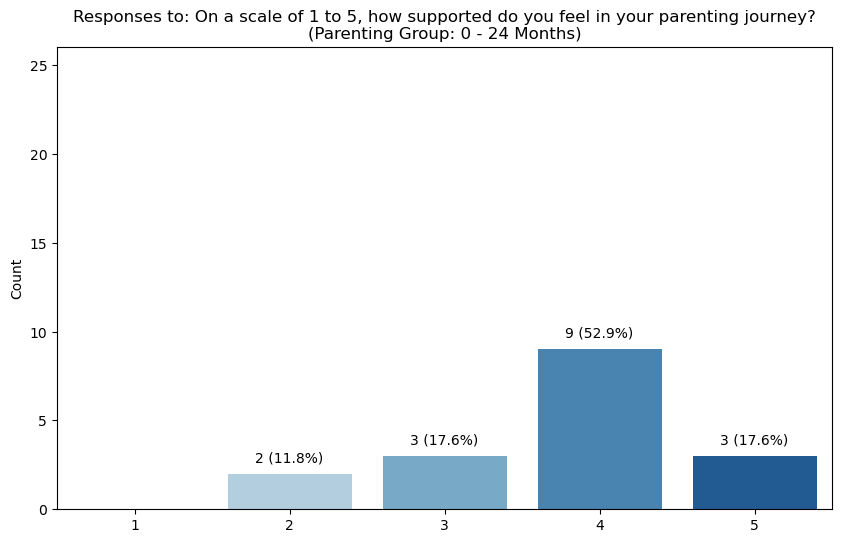

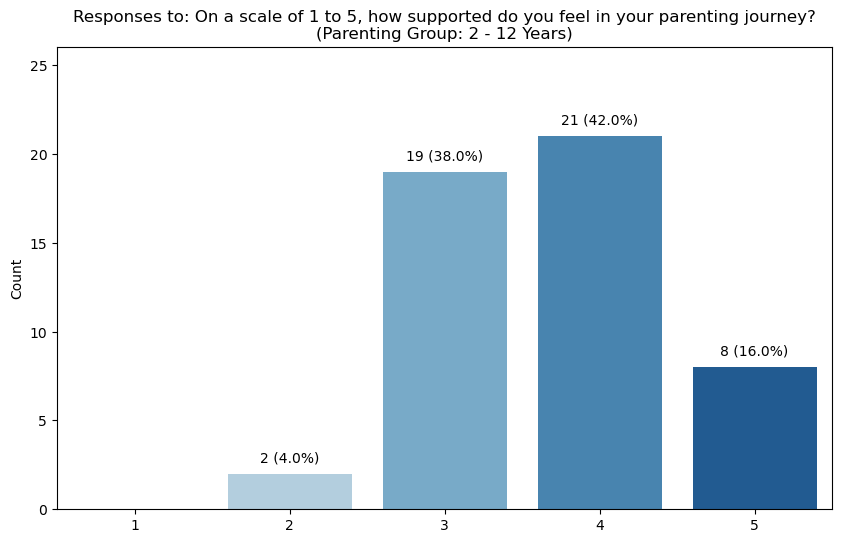

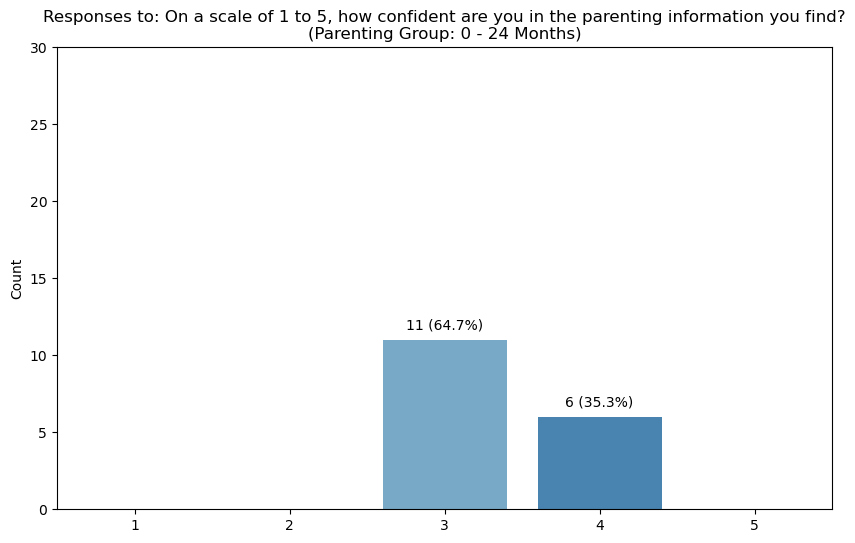

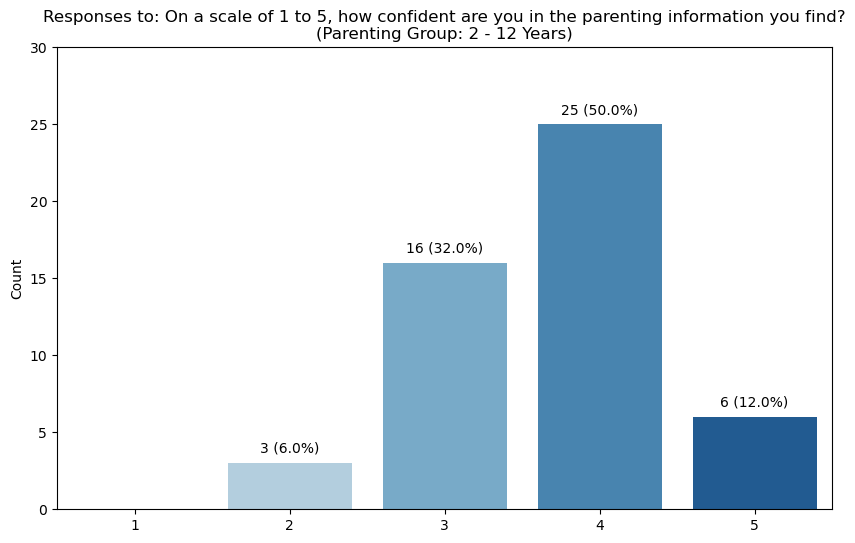

In [13]:
def plot_scale_questions(df, scale_questions, group_col="Parenting Group"):
    """
    Generates vertical bar charts for scale questions (1-5) and ensures all scale values (1 to 5) are shown.
    
    Parameters:
        df (pd.DataFrame): The survey data.
        scale_questions (list): List of scale question column names to visualize.
        group_col (str): The column used for grouping (default is "Parenting Group").
    """
    # Rename groups for clarity
    group_rename = {
        "Group 1": "0 - 24 Months",
        "Group 2": "2 - 12 Years"
    }

    # Process each scale question and plot
    for question_col in scale_questions:
        # Find the maximum count for both groups first to sync the x-axis
        max_count = 0
        for group in df[group_col].unique():
            # Filter data for the specific parenting group
            df_filtered = df[df[group_col] == group]

            # Ensure scale values are strictly 1-5 and count them
            response_counts = df_filtered[question_col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0).reset_index()
            response_counts.columns = [question_col, "Count"]

            # Update max_count for the x-axis limit
            max_count = max(max_count, response_counts["Count"].max())

        # Plot each group's chart
        for group in df[group_col].unique():
            plt.figure(figsize=(10, 6))

            # Filter data for the specific parenting group
            df_filtered = df[df[group_col] == group]

            # Ensure scale values are strictly 1-5 and count them
            response_counts = df_filtered[question_col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0).reset_index()
            response_counts.columns = [question_col, "Count"]

            # Plot vertical bar chart for scale question
            ax = sns.barplot(data=response_counts, x=question_col, y="Count", orient="v", palette="Blues")

            # Annotate bars with counts and percentages
            total_responses = response_counts["Count"].sum()  # Total responses for this group
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    percentage = (height / total_responses) * 100
                    ax.annotate(f"{height:.0f} ({percentage:.1f}%)",
                                (p.get_x() + p.get_width() / 2., height + 0.5),
                                ha='center', va='bottom', fontsize=10, color='black')

            # Set x-axis limit based on the maximum count across both groups
            plt.ylim(0, max_count + 5)  # Ensure some space on top for readability

            plt.ylabel("Count")
            plt.xlabel("")  # Remove duplicate question title from the x-axis
            plt.title(f"Responses to: {question_col}\n(Parenting Group: {group_rename.get(group, group)})")  # Title with renamed groups
            plt.show()

# Run this function separately for scale questions
scale_questions = [
    "On a scale of 1 to 5, how supported do you feel in your parenting journey?",
    "On a scale of 1 to 5, how confident are you in the parenting information you find?"
]

plot_scale_questions(df, scale_questions)